In [1]:
import cv2
import os
import numpy as np
import random
import xml.etree.ElementTree as ET
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical

# Set the paths to the folders containing the images and annotated files
img_folder = r'C:/Users/DELL 7270/Desktop/labelImage-master/Images'
annot_folder = r'C:/Users/DELL 7270/Desktop/labelImage-master/annotations'

# Define the target size for resizing the images
target_size = (32, 32)

# Define the data augmentation parameters
rotation_range = 15 # In degrees
scale_range = (0.8, 1.2)
translation_range = (0.1, 0.1)

# Define the feature extraction method
feature_method = lambda img: cv2.Canny(img, threshold1=100, threshold2=200)

# Define the label encoder
one_hot_encoder = OneHotEncoder()

# Define a function for data augmentation
def augment_data(img, bboxes):
    # Randomly apply rotation, scaling, and translation to the image and bounding boxes
    angle = random.uniform(-rotation_range, rotation_range)
    scale = random.uniform(scale_range[0], scale_range[1])
    tx = random.uniform(-translation_range[0], translation_range[0])
    ty = random.uniform(-translation_range[1], translation_range[1])

    # Compute the rotation matrix
    center = (img.shape[1] / 2, img.shape[0] / 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)

    # Apply the rotation, scaling, and translation to the image
    img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]), borderMode=cv2.BORDER_REPLICATE)
    
    # Apply the rotation, scaling, and translation to the bounding boxes
    new_bboxes = []
    for bbox in bboxes:
        xmin, ymin, xmax, ymax, label = bbox
        pts = np.float32([[xmin, ymin], [xmax, ymin], [xmax, ymax], [xmin, ymax]]).reshape(-1, 1, 2)
        new_pts = cv2.transform(pts, M)
        new_xmin = int(min(new_pts[:, :, 0]))
        new_ymin = int(min(new_pts[:, :, 1]))
        new_xmax = int(max(new_pts[:, :, 0]))
        new_ymax = int(max(new_pts[:, :, 1]))
        new_bboxes.append((new_xmin, new_ymin, new_xmax, new_ymax, label))

    return img, new_bboxes

# Initialize the X and y lists for storing the features and labels, respectively
X = []
y = []

# Loop through the annotated files
for annot_file in os.listdir(annot_folder):
    # Get the name of the image file associated with the annotation file
    img_file = os.path.splitext(annot_file)[0] + '.jpg'
    img_path = os.path.join(img_folder, img_file)

    # Load the image and resize it to the target size
    img = cv2.imread(img_path)
    img = cv2.resize(img, target_size)

    # Load the annotation file and extract the bounding boxes and labels
    tree = ET.parse(os.path.join(annot_folder, annot_file))
    root = tree.getroot()
    bboxes = []
    for obj in root.findall('object'):
        label = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)



ModuleNotFoundError: No module named 'cv2'

In [5]:
!pip list

Package                           Version
--------------------------------- -----------
absl-py                           1.4.0
anyio                             3.6.2
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
asttokens                         2.2.1
astunparse                        1.6.3
attrs                             22.2.0
Babel                             2.11.0
backcall                          0.2.0
beautifulsoup4                    4.11.1
bleach                            6.0.0
bokeh                             3.0.3
cachetools                        5.3.0
certifi                           2022.12.7
cffi                              1.15.1
charset-normalizer                3.0.1
colorama                          0.4.6
comm                              0.1.2
contourpy                         1.0.7
cycler                            0.11.0
debugpy                           1.6.6
decorator            

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [3]:
import requests
import os
import zipfile

# Download the file from the URL
url = "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"
response = requests.get(url)
with open("/tmp/cats-and-dogs.zip", "wb") as f:
    f.write(response.content)

# Extract the ZIP file
local_zip = "/tmp/cats-and-dogs.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp")
zip_ref.close()


FileNotFoundError: [Errno 2] No such file or directory: '/tmp/cats-and-dogs.zip'

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [4]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [5]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [6]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

In [7]:
model.fit(xs, ys, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 72.0495
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 56.6861
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 44.5989
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 35.0892
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 27.6074
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 21.7211
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 17.0901
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 13.4465
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 10.5800
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 8.3247
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 6.5503
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 5.1543
Epoch 13/100
1/1 [==============================

In [8]:
print(model.predict([05.0]))

1/1 [==============================] - 1s 934ms/step
[[15.979025]]


In [8]:
import tensorflow as tf
print(tf.__version__)

2.12.0-rc0


In [9]:
mnist = tf.keras.datasets.fashion_mnist

In [10]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

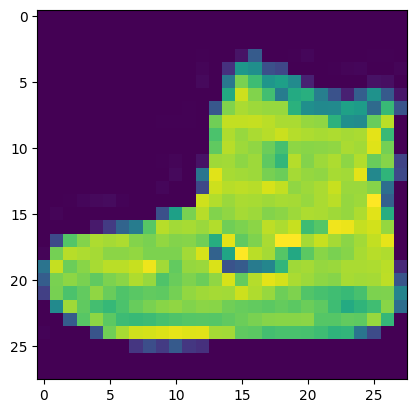

In [11]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [12]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [14]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4930 - accuracy: 0.8265
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3705 - accuracy: 0.8663
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3335 - accuracy: 0.8790
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3100 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2925 - accuracy: 0.8918


In [15]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 3ms/step - loss: 0.3496 - accuracy: 0.8740


[0.34956419467926025, 0.8740000128746033]

In [16]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 38s 19ms/step - loss: 0.4699 - accuracy: 0.8320
Epoch 2/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3588 - accuracy: 0.8693
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3214 - accuracy: 0.8821
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2987 - accuracy: 0.8893
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2800 - accuracy: 0.8964


In [17]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [ ]:
import os
import shutil
import random

# Set the path to your dataset directory
dataset_path = r'C:\Users\DELL 7270\Desktop\model pract\kagglecatsanddogs_5340\PetImages'

# Set the paths to the training and testing directories
training_path = r'C:\Users\DELL 7270\Desktop\model pract\kagglecatsanddogs_5340\training'
testing_path = r'C:\Users\DELL 7270\Desktop\model pract\kagglecatsanddogs_5340\testing'

# Set the training/testing split ratio
split_ratio = 0.8

# Loop through the cat and dog subdirectories
for animal_type in os.listdir(dataset_path):
    animal_path = os.path.join(dataset_path, animal_type)
    if os.path.isdir(animal_path):
        # Create the subdirectories in the training and testing directories
        os.makedirs(os.path.join(training_path, animal_type), exist_ok=True)
        os.makedirs(os.path.join(testing_path, animal_type), exist_ok=True)
        
        # Get the list of image files
        image_files = os.listdir(animal_path)
        # Shuffle the list of image files
        random.shuffle(image_files)
        # Calculate the split point
        split_point = int(len(image_files) * split_ratio)
        
        # Copy the training images
        for image_file in image_files[:split_point]:
            source_path = os.path.join(animal_path, image_file)
            destination_path = os.path.join(training_path, animal_type, image_file)
            shutil.copyfile(source_path, destination_path)
            
        # Copy the testing images
        for image_file in image_files[split_point:]:
            source_path = os.path.join(animal_path, image_file)
            destination_path = os.path.join(testing_path, animal_type, image_file)
            shutil.copyfile(source_path, destination_path)


In [3]:
import keras_ocr
import matplotlib.pyplot as plt

In [4]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\humpa\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\humpa\.keras-ocr\crnn_kurapan.h5


In [6]:
images = [
   keras_ocr.tools.read(img) for img in ['C:/Users/humpa/Downloads/CF01048108H8WK-IdFront.jpg'
                                       ] 

]


In [10]:
# generate text predictions from the images
prediction_groups = pipeline.recognize(images)

2/2 [==============================] - 4s 180ms/step


In [9]:
predicted_image = prediction_groups[1]
for text, box in predicted_image:
    print(text)

IndexError: list index out of range